In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bathy_sim import BathySim
import numpy as np

In [2]:
bty = BathySim(seed=123,range_accuracy=.001)

In [3]:
grid_view = bty.generate_grid_view()

(0, 0) 99.5412929094129 8.924388862803859


In [4]:
X = np.linspace(50,450,5)
Y = np.linspace(50,450,5)
H = [0]#np.linspace(-5,1,5)

XYH = np.array(np.meshgrid(X,Y,H)).T.reshape(-1,3)


In [11]:
teach = bty.mb_sample(250,250,0,sensor=False)
repeat = [bty.mb_sample(x,y,h,sensor=False) for x,y,h in XYH]

<IPython.core.display.Javascript object>


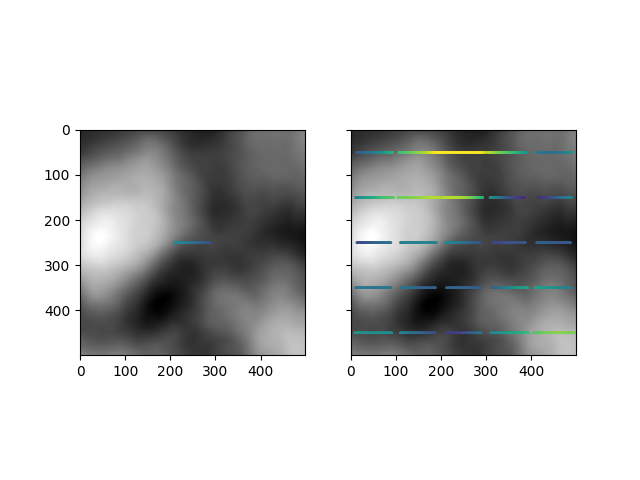

In [12]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True)
ax[0].imshow(grid_view,cmap='gray')
ax[0].scatter(teach[:,0],teach[:,1],c=teach[:,2],s=1,vmin=80,vmax=120)

ax[1].imshow(grid_view,cmap='gray')
for r in repeat:
    ax[1].scatter(r[:,0],r[:,1],c=r[:,2],s=.5,vmin=80,vmax=120)

<IPython.core.display.Javascript object>


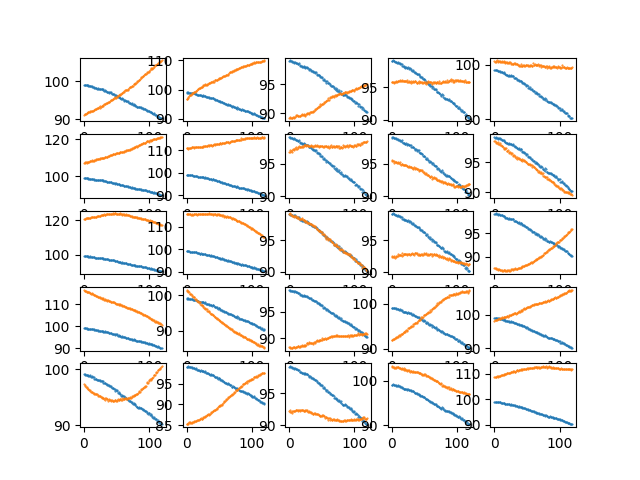

In [13]:
fig,ax = plt.subplots(5,5)
ax = ax.flatten()
for i,r in enumerate(repeat):
    ax[i].plot(teach[:,2],'.',markersize=1)
    ax[i].plot(r[:,2],'.',markersize=1)